<a href="https://colab.research.google.com/github/Ishanavi/ConfusionMatrix/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_upload = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("heart.csv")

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

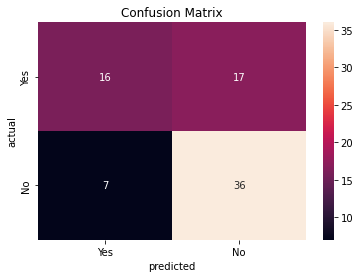

In [9]:
from sklearn.model_selection import train_test_split

age = df["age"]
heart_attack = df["target"]

age_train,age_test,heart_attack_train,heart_attack_test = train_test_split(age,heart_attack,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(age_train.ravel(),(len(age_train),1))
Y = np.reshape(heart_attack_train.ravel(),(len(heart_attack_train),1))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto',
                   n_jobs=None, penalty="l2", random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

x_test = np.reshape(age_test.ravel(),(len(age_test),1))
y_test = np.reshape(heart_attack_test.ravel(),(len(heart_attack_test),1))

heart_attack_prediction = classifier.predict(x_test)

actual_values = []
predicted_values = []

for i in heart_attack_prediction:
  if i == 0:
    predicted_values.append("No")
  else:
    predicted_values.append("Yes")

for i in y_test.ravel():
  if i == 0:
    actual_values.append("No")
  else:
    actual_values.append("Yes")

labels = ["Yes","No"]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(actual_values,predicted_values)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [11]:
accuracy = (16+36)/(16+17+7+36)
print(f"accuracy = {accuracy}")

accuracy = 0.6842105263157895


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

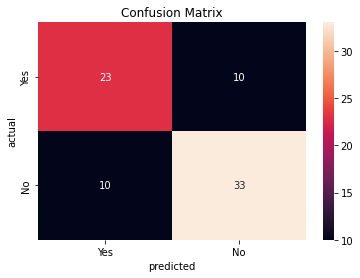

In [13]:
factors = df[["age","sex","cp","chol","thalach"]]
heart_attack_t = df["target"]

factor_train,factor_test,heart_attack_t_train,heart_attack_t_test = train_test_split(factors,heart_attack_t,test_size = 0.25,random_state =0)

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
factor_train = sc_x.fit_transform(factor_train)
factor_test = sc_x.transform(factor_test)

classifier_2 = LogisticRegression(random_state = 0)
classifier_2.fit(factor_train,heart_attack_t_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto',
                   n_jobs=None, penalty="l2", random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

heart_attack_prediction_1 = classifier_2.predict(factor_test)

predicted_values_1 = []
actual_values_1 = []

for i in heart_attack_prediction_1:
  if i == 0:
    predicted_values_1.append("No")
  else:
    predicted_values_1.append("Yes")

for i in y_test.ravel():
  if i == 0:
    actual_values_1.append("No")
  else:
    actual_values_1.append("Yes")

cm = confusion_matrix(actual_values_1,predicted_values_1)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [14]:
accuracy2 = (23+33)/(23+10+10+33)
print(f"accuracy2 = {accuracy2}")

accuracy2 = 0.7368421052631579
